# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

In [7]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(*, x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is

<AxesSubplot:xlabel='BPXDI1', ylabel='BPXDI2'>

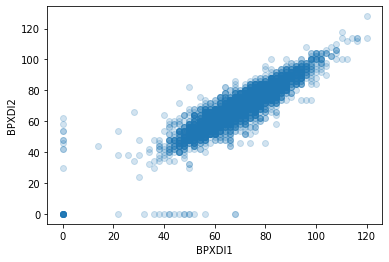

In [12]:
# Scatterplot of first and second measurements of diastolic bp
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})

In [18]:
# 4x4 matrix of correlation coefficients among first two systolic and first two diastolic bp measures
dr = da.loc[:, ["BPXSY1", "BPXDI1", "BPXSY2", "BPXDI2"]].dropna().corr()
dr

,BPXSY1,BPXDI1,BPXSY2,BPXDI2
BPXSY1,1.000000,0.317497,0.962287,0.277681
BPXDI1,0.317497,1.000000,0.329843,0.884722
BPXSY2,0.962287,0.329843,1.000000,0.298392
BPXDI2,0.277681,0.884722,0.298392,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

In [26]:
print("Correlation between diastolic BP:\n", dr.loc[["BPXDI1"],["BPXDI2"]])
print("\nCorrelation between systolic BP:\n", dr.loc[["BPXSY1"],["BPXSY2"]])

Correlation between diastolic BP:
           BPXDI2
BPXDI1  0.884722

Correlation between systolic BP:
           BPXSY2
BPXSY1  0.962287


The correlation between repeated measurements of diastolic blood pressure and the correlation between repeated measurements of systolic blood pressure are both strong positive associations. 

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

In [27]:
print("Correlation between diastolic BP:\n", dr.loc[["BPXSY2"],["BPXDI2"]])
print("\nCorrelation between systolic BP:\n", dr.loc[["BPXSY1"],["BPXDI1"]])

Correlation between diastolic BP:
           BPXDI2
BPXSY2  0.298392

Correlation between systolic BP:
           BPXDI1
BPXSY1  0.317497


The second systolic and second diastolic blood pressure measure is less correlated than the first systolic and first diastolic blood pressure measure.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

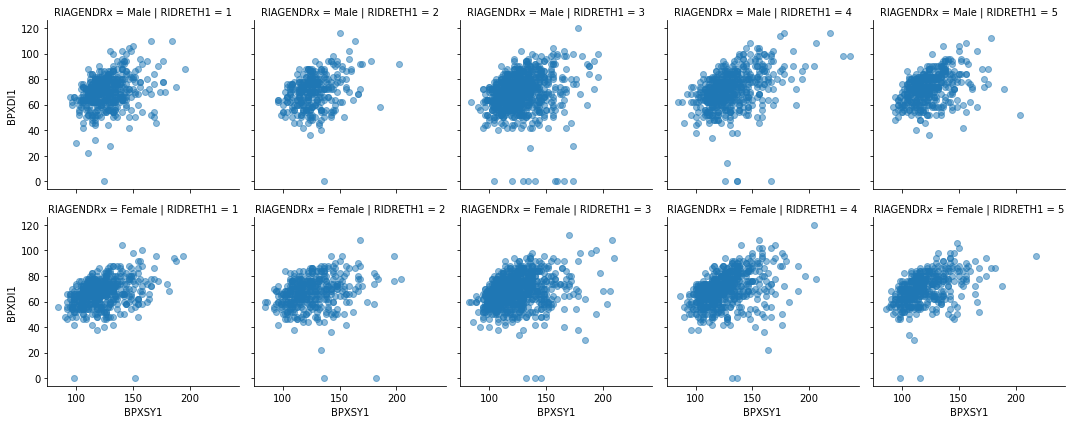

In [48]:
# Grid of scatterplots between first systolic and first diastolic bp measurement
# Stratify by gender (rows) and by ethnicity (columns)
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

Although some ethnic groups tend to have higher/lower first systolic and first diastolic blood pressure measurements than others, the relationship between first systolic and first diastolic blood pressure measurements within genders is roughly similar across the ethnic groups.

One notable observation is that ethnic group 5, which consists of people who report being multi-racial or are of any race not treated as a separate group (due to small sample size), the correlation between first systolic and first diastolic blood pressure measurements is stronger. This is not surprising, as greater heterogeneity can allow correlations to emerge that are indiscernible in more homogeneous data.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [32]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the

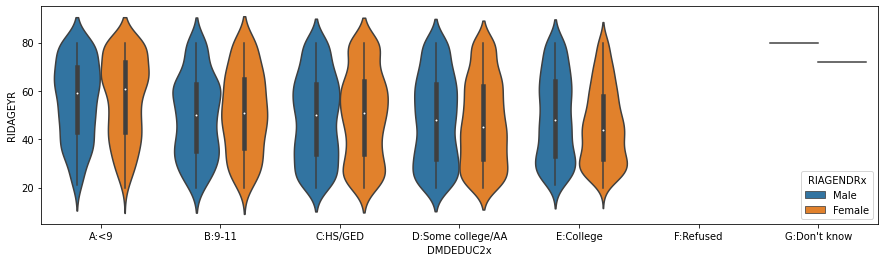

In [40]:
# Relabel educational attainment category to meaningful strings
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "A:<9", 2: "B:9-11", 3: "C:HS/GED", 4: "D:Some college/AA", 5: "E:College", 
                                       7: "F:Refused", 9: "G:Don't know"})

# Violin plots to compare the distributions of ages within groups defined by gender and educational attainment
plt.figure(figsize=(15, 4))
a = sns.violinplot(x="DMDEDUC2x", y="RIDAGEYR", hue="RIAGENDRx", data=da, order=["A:<9", "B:9-11", "C:HS/GED", "D:Some college/AA", 
                   "E:College", "F:Refused", "G:Don't know"])

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

1) The mean age for those with lower educational attainment is higher than the mean age for those with higher educational attainment. This is unsurprising as educational levels are increase as the overall population grows in affluence. This causes the demographic who possess higher educational qualifications at this point of time to be those who are younger. 

2) The age distribution for each demographic group is similar for both genders. However, for the college demographic group, the data seems to show that the mean age for females is lower than the mean age for males. 

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

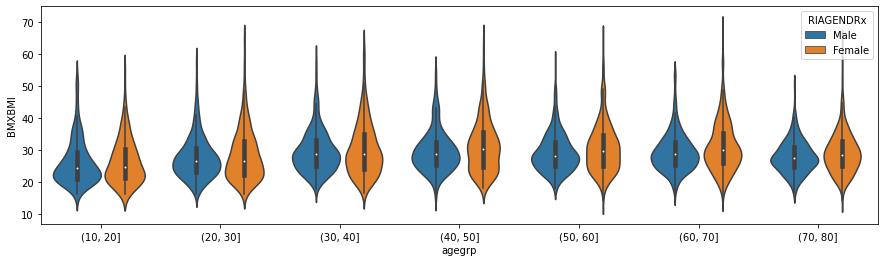

In [49]:
# Cut age into series of 10-year age bands
da["agegrp"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80])

# Violin plots to compare the distributions of BMI within a series of 10-year age bands
# Stratify by gender
plt.figure(figsize=(15, 4))
a = sns.violinplot(x="agegrp", y="BMXBMI", hue="RIAGENDRx", data=da)

__Q5a.__ Comment on the trends in BMI across the demographic groups.

1) As age increases, BMI increases but plateaus after the 40-50 age group
2) Males generally have less variable BMI compared to females
3) The median BMI is relatively similar between males and females within each age group 

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [53]:
# Relabel ethnicity groups categories to meaningful strings
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-hispanic White", 
                                      4: "Non-hispanic Black", 5: "Other Race"})

# Relabel health-insurance status categories to meaningful strings
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})

# Create a new data set that omits people who responded "Don't know" or who refused to answer these questions.
db = da.loc[(da.HIQ210x != "Don't Know") & (da.HIQ210x != "Refused"), :]

# Frequency table for the joint distribution of ethnicity groups and health-insurance status
x = pd.crosstab(db.RIDRETH1x, db.HIQ210x)
x.apply(lambda z: z/z.sum(), axis=1)

HIQ210x,No,Yes
RIDRETH1x,,
Mexican American,0.861401,0.138599
Non-hispanic Black,0.891242,0.108758
Non-hispanic White,0.932564,0.067436
Other Hispanic,0.871304,0.128696
Other Race,0.918033,0.081967


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

HIQ210x: In the past 12 months, was there any time when {you/SP} did not have any health insurance coverage?

Ans: Mexican American group had the highest rate of being uninsured in the past year